# Part 2: Data Preprocessing:  Fundamental Analysis

- [ ] corporate analysis due to data issues will not be used therefore, it has been removed from this notebook and further work
-  [X] Macro-economic analysis is used

**_TABLE OF CONTENT_**

        1 Data Exploration
        2 Data preprocessing
            2.1.Impute missing values
            2.2.Solve outliers and other data quality issues
            2.3.Create interaction effects
            2.4.Normalize or standardize data
        3.  Calculate correlations
            3.1 Correlation between independent variables
            3.2 Correlation with dependent variable
            

In [1]:
# Imports
import datetime
from datetime import timedelta, date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Visual setttings
from IPython.core.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})
plt.style.use(['science','no-latex', 'high-contrast'])

#  Help functions from preprocessing
from preprocessing import *
from helpFunctions import *

- Macro-economic analysis
        - date                                  - crude_oil
        - brent_crude_oil                       - thirtheen_week_treasury_bill
        - treasury_yield_five                   - treasury_yield_ten,
        - treasury_yield_thirty                 - dji
        - dax                                   - nikkei
        - gold                                  - bitcoin
        - usd_eur                               - usd_gbp
        - usd_cad                               - usd_jpy
        - usd_cny                               - usd_aud
        - usd_mxn



## 1 Data Exploration
### Retrieve macroeconomic table

In [2]:
%%time
# Retrieve table from database by making use of function from preprocessing
macro = get_macroeconomic_table()
# Sort values by date
macro = macro.sort_values(by = 'date').reset_index(drop = True)
# Show first observations from table
macro.head().round(3)

Wall time: 220 ms


,date,usd_eur,usd_cny,usd_gbp,usd_cad,usd_mxn,usd_jpy,libor,gdp,crude_oil,brent_crude_oil,thirtheen_week_treasury_bill,treasury_yield_five,treasury_yield_ten,treasury_yield_thirty,usd_aud,dji,dax,nikkei,gold,bitcoin
0,2020-03-23,0.935,7.095,0.860,1.446,24.746,110.462,NaN,NaN,23.36,27.03,-0.040,0.395,0.764,1.344,1.738,18591.930,1313.0,16887.779,1567.0,5830.255
1,2020-03-24,0.929,7.091,0.862,1.448,25.336,110.827,NaN,NaN,24.01,27.15,-0.033,0.496,0.816,1.369,1.702,20704.910,1313.0,19546.631,1660.2,6734.804
2,2020-03-25,0.926,7.062,0.848,1.444,24.769,111.120,NaN,NaN,24.49,27.39,-0.070,0.521,0.858,1.423,1.673,21200.551,1313.0,18664.600,1632.3,6681.063
3,2020-03-26,0.918,7.114,0.844,1.422,24.008,110.876,NaN,NaN,22.60,26.34,-0.105,0.478,0.811,1.395,1.693,22552.170,1313.0,19389.430,1650.1,6716.440
4,2020-03-27,0.918,7.114,0.844,1.422,24.008,110.876,NaN,NaN,22.60,NaN,-0.105,0.478,0.811,1.395,1.693,22552.170,1175.7,19389.430,1650.1,6716.440


Change column names to increase readability of the graphs that will be created
Sort the columns by name so there is logical grouping of features

In [3]:
macro = macro.rename(columns= {'usd_eur': 'USD/EUR', 'usd_cny': 'USD/CNY', 'usd_gbp': 'USD/GBP','usd_mxn': 'USD/MXN',
                       'usd_jpy': 'USD/JPY', 'crude_oil': 'Crude Oil', 'brent_crude_oil':'Brent Crude Oil',
                       'thirtheen_week_treasury_bill'
                       '': '13-week Treasury Bill', 'treasury_yield_five': '5yr Treasury Yield',
                       'treasury_yield_ten': '10yr Treasury Yield', 'treasury_yield_thirty': '30yr Treasury Yield',
                       'usd_aud': 'USD/AUD', 'dji': 'DJI', 'nikkei': 'NIKKEI', 'gold': 'Gold',
                       'usd_cad': 'USD/CAD', 'bitcoin': 'Bitcoin'})
macro = macro.reindex(sorted(macro.columns), axis=1)

#### Distribution of the features

<ipython-input-7-4ea31bbee4e5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  macro[clmns].hist(ax=ax, color = 'k', bins= 20)


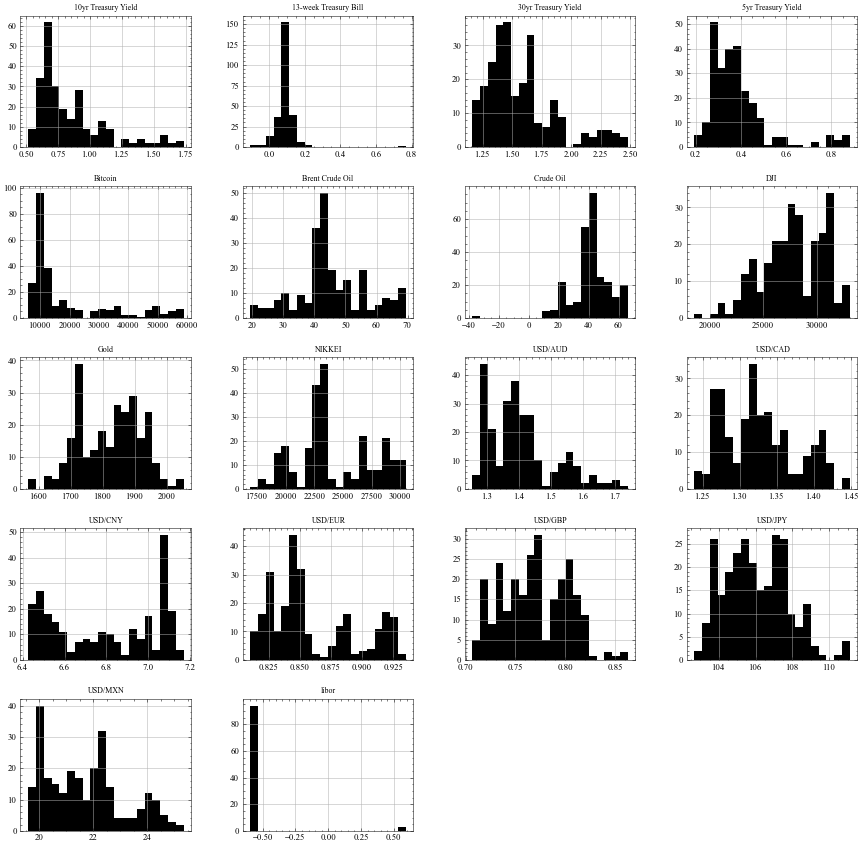

In [7]:
clmns = macro.columns.drop(['date', 'dax', 'gdp'])
fig, ax = plt.subplots(figsize = (15,15))
macro[clmns].hist(ax=ax, color = 'k', bins= 20)

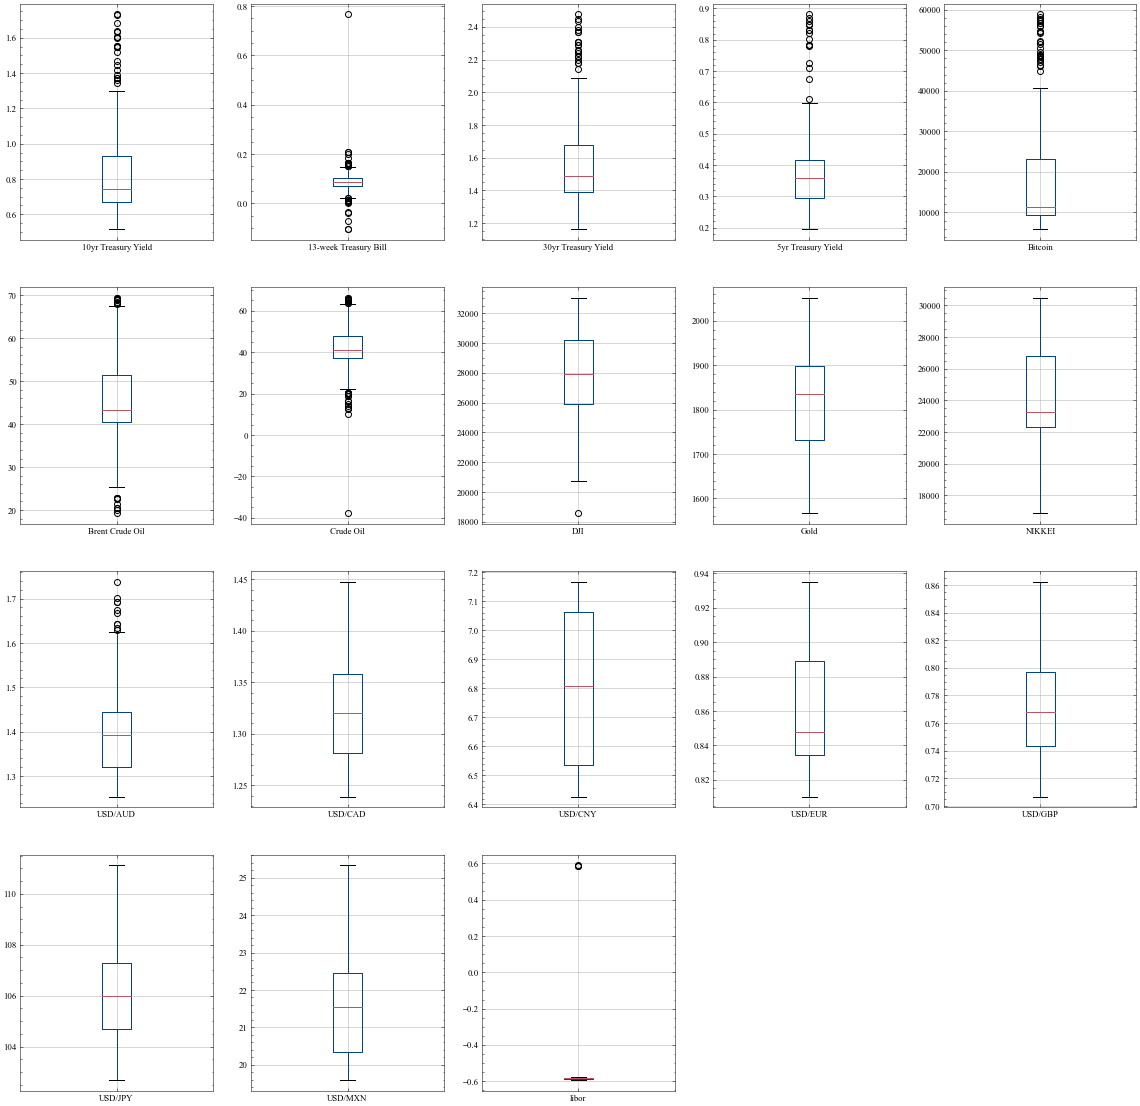

In [8]:
fig = plt.figure(figsize=(20,20))

for i, c in enumerate(clmns):
    #  subplot #i
    plt.subplot(4,5,i+1)
    plt.rcParams['font.size'] = '20'
    pd.DataFrame(macro[c]).boxplot()

plt.show()
# plt.savefig('D:/Downloads/macro_box.jpg')

In [10]:
macro.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
10yr Treasury Yield,258.0,0.845,0.265,0.515,0.669,0.745,0.932,1.732
13-week Treasury Bill,258.0,0.088,0.060,-0.105,0.070,0.088,0.103,0.766
30yr Treasury Yield,258.0,1.576,0.293,1.162,1.389,1.485,1.676,2.476
5yr Treasury Yield,258.0,0.385,0.134,0.195,0.296,0.360,0.417,0.881
Bitcoin,260.0,18964.067,14630.357,5830.255,9411.841,11419.967,23163.807,58870.895
Brent Crude Oil,236.0,45.375,11.359,19.330,40.490,43.355,51.340,69.360
Crude Oil,261.0,41.345,12.695,-37.630,37.300,40.970,47.740,66.090
DJI,260.0,27799.573,2864.274,18591.930,25874.475,27896.721,30202.879,33015.371
Gold,260.0,1822.017,96.903,1567.000,1731.950,1834.950,1898.150,2051.500
NIKKEI,259.0,24169.336,3327.273,16887.779,22318.210,23290.859,26803.825,30467.750


- We notice we have no correct value for the GDP
    We will handle this problem in the next section
- An extreme value is found for DAX

In [11]:
macro[['date', "dax"]].head()

,date,dax
0,2020-03-23,1313.000000
1,2020-03-24,1313.000000
2,2020-03-25,1313.000000
3,2020-03-26,1313.000000
4,2020-03-27,1175.699951


We see extremely varying values for the DAX index
Over the last year the value of the dax index never went under 8000 and never above 15000

In [12]:
len(macro.loc[macro['dax'] <= 8000]) + len(macro.loc[macro['dax'] > 15000])

257

Almost all values collected for the dax are incorrect

## 2. Data Preprocessing
### 2.1 Impute Missing values

In [13]:
# Calculate missing values for each column, if column does not have missing values
# it will not be included in the shown table
get_NAN_columns(macro)

,Absolute value,Percentage
10yr Treasury Yield,3.0,0.01
13-week Treasury Bill,3.0,0.01
30yr Treasury Yield,3.0,0.01
5yr Treasury Yield,3.0,0.01
Bitcoin,1.0,0.00
Brent Crude Oil,25.0,0.10
DJI,1.0,0.00
Gold,1.0,0.00
NIKKEI,2.0,0.01
dax,1.0,0.00


- GDP:  No values, Remove GDP
- Libor: a lot of missing values so remove
- DAX index: almost all wrong values
- Other features: almost no missing values

In [14]:
# Delete GDP from feature set
macro = macro.drop(columns=['gdp', 'libor', 'dax'])

We notice multiple variables with exactly one missing value
We check if it is the same observation  or all different observations with each one missing

In [15]:
len(macro[macro.isnull().any(axis =1)])

29

The first two days of collecting something must have gone wrong with the process of collecting
these values.
We will impute these values with the mean


### 2.2 Solve data quality issues and check for outliers
Possible that some days data was collected while not a trading day
Drop days that are not trading days

In [16]:
trading_days = get_trading_days()
macro['date'] = pd.to_datetime(macro['date'])

# Create list of all dates that we have data from
collected_dates = macro.date.dt.date.unique()
# Create list of days that should be collected but are not
diff = list(set(collected_dates) - set(trading_days))

# Show findings
print('Total trading: ', len(trading_days))
print('Total collected days: ', len(collected_dates))
print('Difference between them: ', len(diff))

# Show all dates that should be included
diff.sort()
for dt in diff:
    print(dt)


Total trading:  260
Total collected days:  261
Difference between them:  3
2021-03-06
2021-03-14
2021-03-20


We have more days than there were official trading days,
we discard of these 2 days that we have collected but are not needed

In [17]:
macro = macro[~macro['date'].isin(diff)]

### 2.2.7.Normalize or standardize data

Normalization is being done in the preprocessing.py script
with choice of either one
No further breakdown is given here

## 3. Correlations
### 3.1 Correlation between dependent and independent variable
For each company separately

In [18]:

def corr_plot(macro, tck):
    # Calculate label: Up or down: 1 or 0
    tech_table = get_technical_table()
    tech_table = tech_table[tech_table['ticker']== tck]
    tech_table = tech_table.sort_values(by='date').reset_index(drop = True)
    tech_table['label'] = np.where(tech_table['close'].shift(-1) <= tech_table['close'], 0, 1)
    label = tech_table[['date', 'label']]
    macro['date'] = pd.to_datetime(macro.date).dt.date
    merged = pd.merge(label, macro, on = 'date', how= 'left')
    buy_Corr = merged.corr()["label"]
    buy_Corr= buy_Corr[np.argsort(buy_Corr, axis = 0)[::-1]] #sort in descending order
    buy_Corr = buy_Corr[1:26] # remove the 'Survived'

    # Plot the top correlationin a bar chart for east visualisation.
    width = 0
    fig, ax = plt.subplots(figsize = (10,6))
    rects = ax.barh(np.arange(len(buy_Corr)), np.array(buy_Corr.values), color = 'k')
    ax.set_yticks(np.arange(len(buy_Corr)) + ((width)/1))
    ax.set_yticklabels(buy_Corr.index, rotation ='horizontal')
    ax.set_xlabel("Correlation coefficient")
    ax.set_title("{} - Correlation Coefficients w.r.t buy/sell".format(tck),fontsize = 14);
    ax.grid(True)

#### APPLE

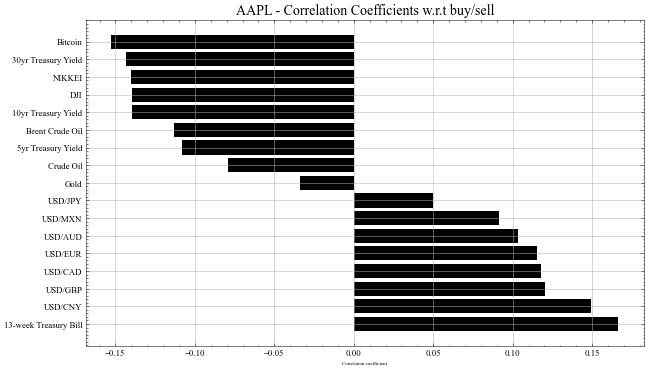

In [19]:
tck = 'AAPL'
corr_plot(macro, tck)

#### AMZN

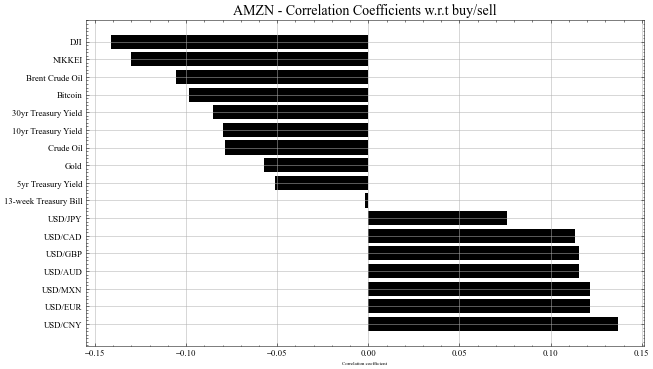

In [20]:
tck = 'AMZN'
corr_plot(macro, tck)

#### GOOG

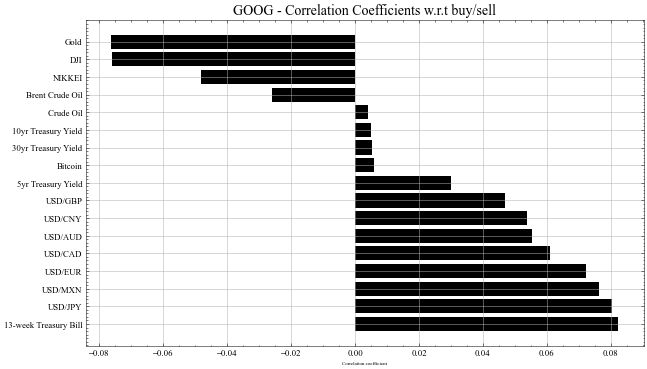

In [22]:
tck = 'GOOG'
corr_plot(macro, tck)

#### FB

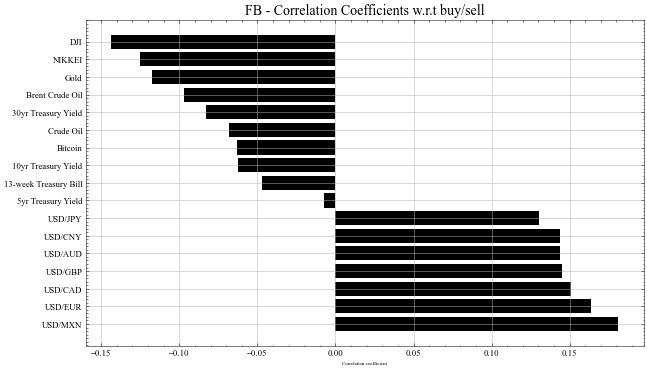

In [23]:
tck = 'FB'
corr_plot(macro, tck)

#### NFLX

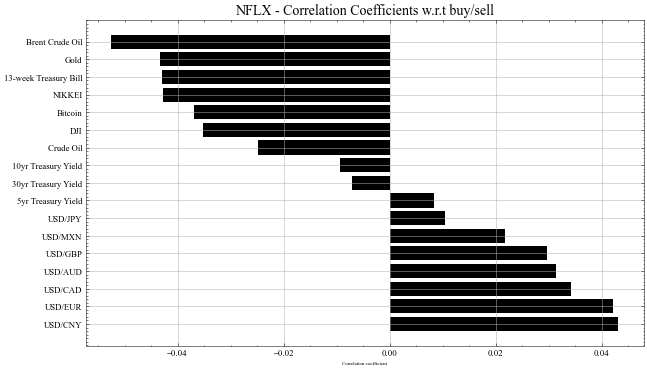

In [21]:
tck = 'NFLX'
corr_plot(macro, tck)

### 3.2 Correlation between independent variables

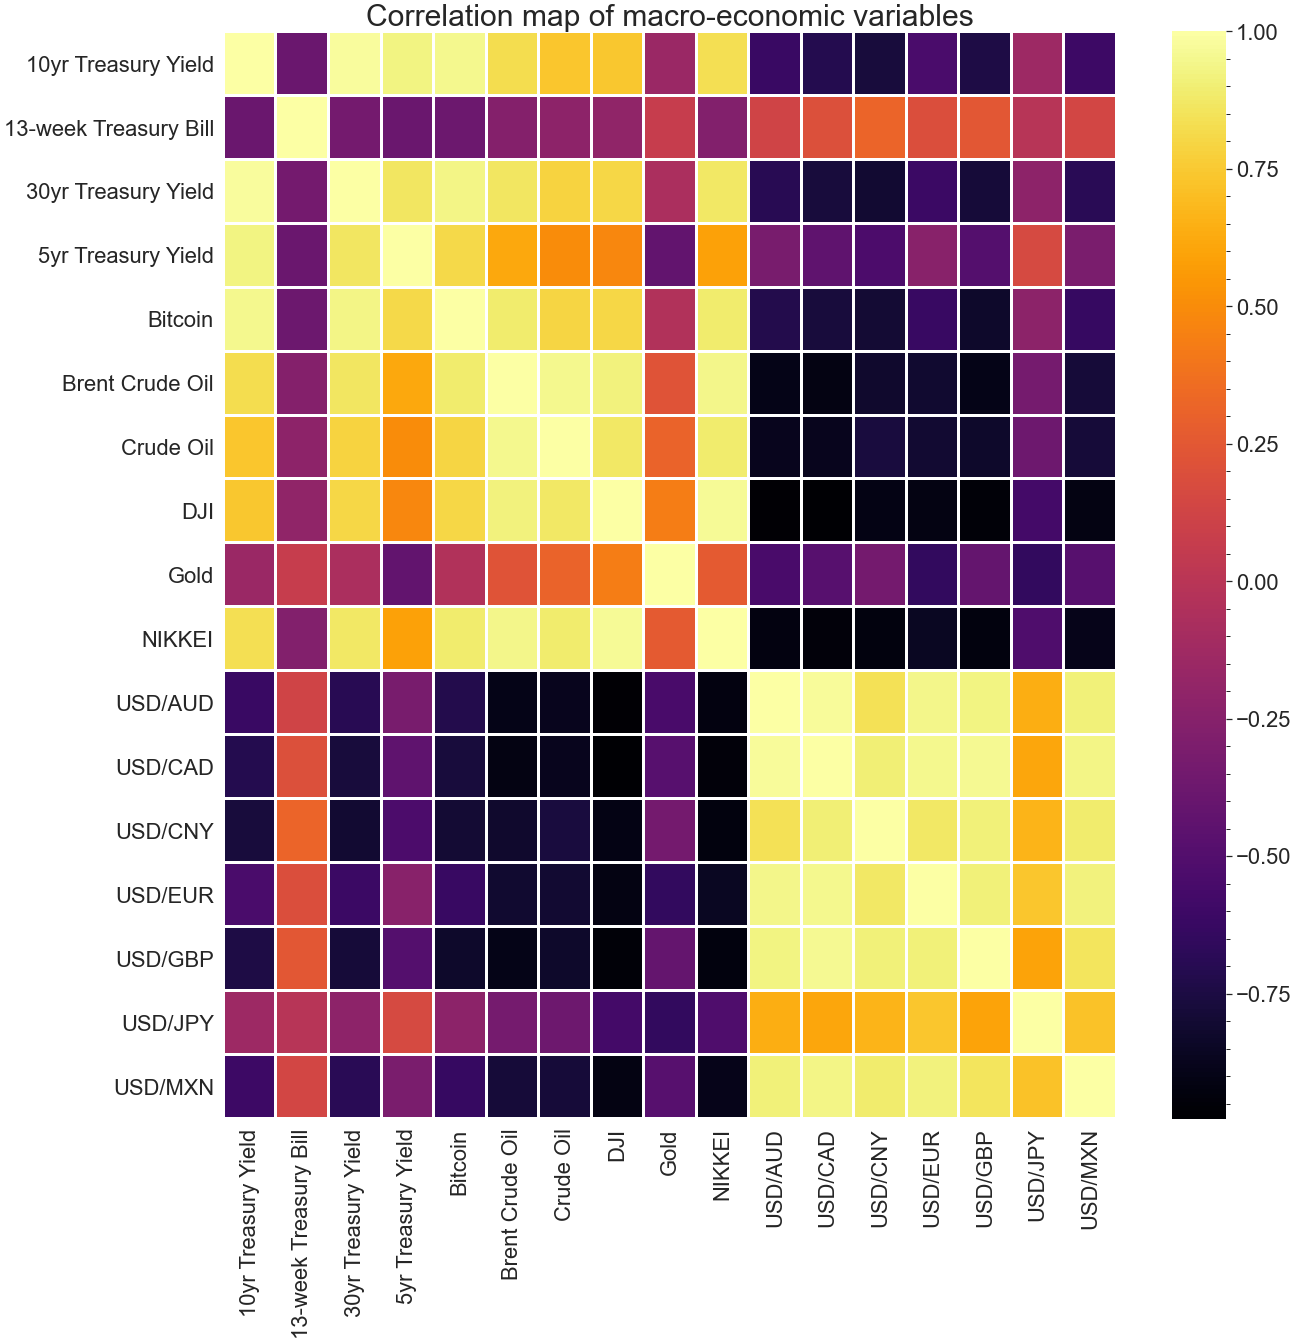

In [24]:
# Calculate correlation matrix
corr_macro = macro.corr()

# set heatmap size
plt.figure(figsize= (20,20))
sns.set(font_scale=2)
sns.heatmap(corr_macro ,cmap = 'inferno', linewidth = 2, )
plt.title('Correlation map of macro-economic variables', fontsize = 30)


In [25]:
corr_macro.style.background_gradient(cmap='coolwarm')

,10yr Treasury Yield,13-week Treasury Bill,30yr Treasury Yield,5yr Treasury Yield,Bitcoin,Brent Crude Oil,Crude Oil,DJI,Gold,NIKKEI,USD/AUD,USD/CAD,USD/CNY,USD/EUR,USD/GBP,USD/JPY,USD/MXN
10yr Treasury Yield,1.000000,-0.387643,0.983149,0.927335,0.945968,0.825341,0.730953,0.742371,-0.155562,0.833963,-0.617525,-0.711929,-0.771336,-0.544091,-0.742954,-0.135903,-0.605270
13-week Treasury Bill,-0.387643,1.000000,-0.343554,-0.386825,-0.377252,-0.261902,-0.216984,-0.203406,0.068015,-0.269661,0.126189,0.203530,0.315959,0.193116,0.243860,-0.011180,0.142150
30yr Treasury Yield,0.983149,-0.343554,1.000000,0.866111,0.934131,0.861100,0.786997,0.800306,-0.069785,0.874541,-0.695637,-0.774906,-0.801952,-0.610994,-0.779930,-0.213928,-0.685734
5yr Treasury Yield,0.927335,-0.386825,0.866111,1.000000,0.814417,0.616172,0.499864,0.479848,-0.423309,0.589619,-0.319290,-0.436692,-0.530964,-0.239465,-0.496508,0.164814,-0.312071
Bitcoin,0.945968,-0.377252,0.934131,0.814417,1.000000,0.889198,0.795219,0.800985,-0.039803,0.888764,-0.714548,-0.769072,-0.799341,-0.624539,-0.823509,-0.227413,-0.632502
Brent Crude Oil,0.825341,-0.261902,0.861100,0.616172,0.889198,1.000000,0.946438,0.919190,0.226022,0.943489,-0.894406,-0.910211,-0.816177,-0.811573,-0.893139,-0.331011,-0.781213
Crude Oil,0.730953,-0.216984,0.786997,0.499864,0.795219,0.946438,1.000000,0.876161,0.305767,0.887312,-0.869320,-0.875434,-0.763490,-0.803586,-0.824571,-0.373675,-0.781313
DJI,0.742371,-0.203406,0.800306,0.479848,0.800985,0.919190,0.876161,1.000000,0.433551,0.963334,-0.961784,-0.977005,-0.905906,-0.913376,-0.947700,-0.574531,-0.912755
Gold,-0.155562,0.068015,-0.069785,-0.423309,-0.039803,0.226022,0.305767,0.433551,1.000000,0.263894,-0.549227,-0.479597,-0.337125,-0.650330,-0.417503,-0.647770,-0.476278
NIKKEI,0.833963,-0.269661,0.874541,0.589619,0.888764,0.943489,0.887312,0.963334,0.263894,1.000000,-0.916701,-0.943057,-0.923452,-0.857631,-0.926498,-0.521319,-0.889092
